<a href="https://colab.research.google.com/github/hcantekin/hcantekin.github.io/blob/main/Brexit_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from google.colab import files
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans



importing data on bodies of ads on facebook and instagram which focus on Brexit in the UK, in 2021. 


In [12]:
df = pd.read_csv('BrexitAds.csv')
df2 = df.dropna()
df2.head()

,id,ad_text
0,0,How Brexit can pollute our rivers - with permi...
1,1,Brexit Reality >> Contrary to the negativity o...
2,2,We are thrilled to release our latest producti...
3,3,üî¥üìíSome dates for your brand new 2022 dia...
4,4,"The World War 3 simulator!,Your country. Your ..."


Making sure text is recognised as string.

In [15]:
df2['ad_text'] = df2['ad_text'].astype('string')
print(df2.dtypes)

id          int64
ad_text    string
dtype: object


<ipython-input-15-4b0269c43ee3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ad_text'] = df2['ad_text'].astype('string')


Cleaning data by removing URLs from text.

In [25]:
df2['text'] = df2['ad_text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df2

<ipython-input-25-2d052a8d2dfa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['text'] = df2['ad_text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])


,id,ad_text,text
0,0,How Brexit can pollute our rivers - with permi...,How Brexit can pollute our rivers - with permi...
1,1,Brexit Reality >> Contrary to the negativity o...,Brexit Reality >> Contrary to the negativity o...
2,2,We are thrilled to release our latest producti...,We are thrilled to release our latest producti...
3,3,üî¥üìíSome dates for your brand new 2022 dia...,üî¥üìíSome dates for your brand new 2022 dia...
4,4,"The World War 3 simulator!,Your country. Your ...","The World War 3 simulator!,Your country. Your ..."
...,...,...,...
2716,2716,"If you'd like a copy, you can either get it fr...","If you'd like a copy, you can either get it fr..."
2717,2717,We take a look at some of the economic side ef...,We take a look at some of the economic side ef...
2718,2718,"Select the most experienced local, national an...","Select the most experienced local, national an..."
2719,2719,We bring you bite-sized news that matters stra...,We bring you bite-sized news that matters stra...


In [26]:
del df2['ad_text']
df2

,id,text
0,0,How Brexit can pollute our rivers - with permi...
1,1,Brexit Reality >> Contrary to the negativity o...
2,2,We are thrilled to release our latest producti...
3,3,üî¥üìíSome dates for your brand new 2022 dia...
4,4,"The World War 3 simulator!,Your country. Your ..."
...,...,...
2716,2716,"If you'd like a copy, you can either get it fr..."
2717,2717,We take a look at some of the economic side ef...
2718,2718,"Select the most experienced local, national an..."
2719,2719,We bring you bite-sized news that matters stra...


Cleaning data and preparing for ML by making all lowercase. 

In [51]:
df3 = df2['text'].str.lower()
df3

0       how brexit can pollute our rivers - with permi...
1       brexit reality >> contrary to the negativity o...
2       we are thrilled to release our latest producti...
3       üî¥üìísome dates for your brand new 2022 dia...
4       the world war 3 simulator!,your country. your ...
                              ...                        
2716    if you'd like a copy, you can either get it fr...
2717    we take a look at some of the economic side ef...
2718    select the most experienced local, national an...
2719    we bring you bite-sized news that matters stra...
2720    üè¥û†åßû†å¢û†å≥û†å£û†å¥û†åø i'm announcing my...
Name: text, Length: 2584, dtype: object

Vectorizing text data and removing stopwords like 'the' etc. 

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
df4 = vectorizer.fit_transform(df3)


Clustering text data, choosing number of clusters. 

In [57]:
k = 8
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(df4)


KMeans(max_iter=100, n_init=1)

Showing key words for each cluster.

In [58]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: 
        print (' %s' % terms[j])
    print('------------')

Cluster 0:
 business
 read
 consultants
 junior
 aka
 mccartney
 tested
 loves
 kids
 sophie
------------
Cluster 1:
 trade
 deals
 standards
 deforestation
 environmental
 post
 tell
 mp
 carbon
 proud
------------
Cluster 2:
 vote
 elections
 local
 eu
 citizens
 registering
 heard
 voice
 nope
 confirmed
------------
Cluster 3:
 dump
 risky
 disrupts
 polluters
 treatment
 sewage
 water
 says
 seas
 rivers
------------
Cluster 4:
 news
 big
 ground
 fortune
 freedom
 money
 jargon
 spin
 threats
 surging
------------
Cluster 5:
 hurdle
 sold
 boris
 johnson
 farmers
 country
 brexit
 account
 hold
 page
------------
Cluster 6:
 brexit
 uk
 eu
 äôs
 vote
 join
 people
 scotland
 new
 free
------------
Cluster 7:
 petition
 mogg
 rees
 jacob
 sign
 scrutiny
 demand
 action
 brexit
 úçô
------------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Creating word cloud to show most frequently used words in ads concerning Brexit. 

In [80]:
with open('BrexitAds.csv', "r") as file:
   text = file.read()
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

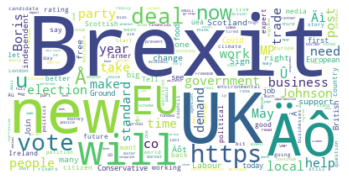

In [81]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()